# Study of Dark Matter Freeze Out

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.misc import derivative as deriv
import matplotlib.pyplot as plt

Constants (natural units):

In [2]:
H0    = 1.5123e-33
T0    = 0.24e-3
G     = 1
GF    = 1.1664e-23
kB    = 1
Mpl   = 1.2211e28
rho_c = 8.07e-11

## 1. Freeze out temperatures CDM and HDM for intastaneous freeze-out

Here we use the equipartition function to calculate the velocity as

\begin{equation}
v = \sqrt{\frac{3k_{B}T}{m}}
\end{equation}

The first step is to calculate the freeze-out temperature and then to find the relic abundance and eventually plot it as a function of the mass. Here we used the Cosmology Lecture Notes of Daniel Baumann.

In [3]:
def T_fo_HDM(masses, scale):
    return pow(((scale*GF)**2)*Mpl*np.ones(len(masses)), (-1/3))

def T_fo_HDM_equipart(masses, scale):
    return pow(3*kB*((scale*GF)**4)*(Mpl**2)/masses, (-1/7))

def T_fo_CDM(masses, scale):
    return masses / np.log(Mpl*((scale*GF)**2)*(masses**3)*pow(3*kB,(1/2)))

In [4]:
def numdens_fo_HDM(masses, T_fo):
    return pow(T_fo, 3)

def numdens_fo_CDM(masses, T_fo):
    return pow(masses*T_fo, (3/2))*np.exp(-masses/T_fo)

In [5]:
def g_s(T):
    
    # Evolution of relativistic
    # degrees of freedom (T in eV).
    
    decoupling_T = np.array([173e9, 90e9, 4e9, 1e9, 1e8, 511e3])
    
    
    if T >= decoupling_T[0]:
        g_s = 106.75
        
    elif decoupling_T[0] > T >= decoupling_T[1]:
        g_s = 96.25
    
    elif decoupling_T[1] > T >= decoupling_T[2]:
        g_s = 86.25
    
    elif decoupling_T[2] > T >= decoupling_T[3]:
        g_s = 75.75
    
    elif decoupling_T[3] > T >= decoupling_T[4]:
        g_s = 17.25
        
    elif decoupling_T[4] > T >= decoupling_T[5]:
        g_s = 10.75
        
    elif T < decoupling_T[5]:
        g_s = 3.94
    
    
    return g_s

Calculate the relic abundance for different scale factors

In [18]:
m_min = 100e8
m_max = 100e10
n_points = 100
masses = np.logspace(np.log10(m_min), np.log10(m_max), num=n_points) # mass of the DM particle

scale_min = 0.4
scale_max = 1.6
n_curves = 5
scales = np.linspace(scale_min, scale_max, num=n_curves) # rescaling of the cross-section


# T_fo_hot = [T_fo_HDM_equipart(masses, scale) for scale in scales]
T_fo_hot = [T_fo_HDM(masses, scale) for scale in scales]
n_fo_hot = [numdens_fo_HDM(masses, T_fo) for T_fo in T_fo_hot]

T_fo_cold = [T_fo_CDM(masses, scale) for scale in scales]
n_fo_cold = [numdens_fo_CDM(masses, T_fo) for T_fo in T_fo_cold]

entropy_ratio_HDM = [[(g_s(T0)*T0**3)/(g_s(temp)*temp**3) for temp in temp_fix_scale] for temp_fix_scale in T_fo_hot]
entropy_ratio_CDM = [[(g_s(T0)*T0**3)/(g_s(temp)*temp**3) for temp in temp_fix_scale] for temp_fix_scale in T_fo_cold]

# CDM_input = list(zip(T_fo_cold, n_fo_cold))
# HDM_input = list(zip(T_fo_hot, n_fo_hot))

CDM_input = list(zip(entropy_ratio_CDM, n_fo_cold))
HDM_input = list(zip(entropy_ratio_HDM, n_fo_hot))

OM_HDM = [((masses*(T0**3)*n_hot/rho_c)*entropy_hot) for (entropy_hot, n_hot) in HDM_input]
OM_CDM = [((masses*(T0**3)*n_cold/rho_c)*entropy_cold) for (entropy_cold, n_cold) in CDM_input]

Plot the relic abundance as a function of mass for different cross sections.

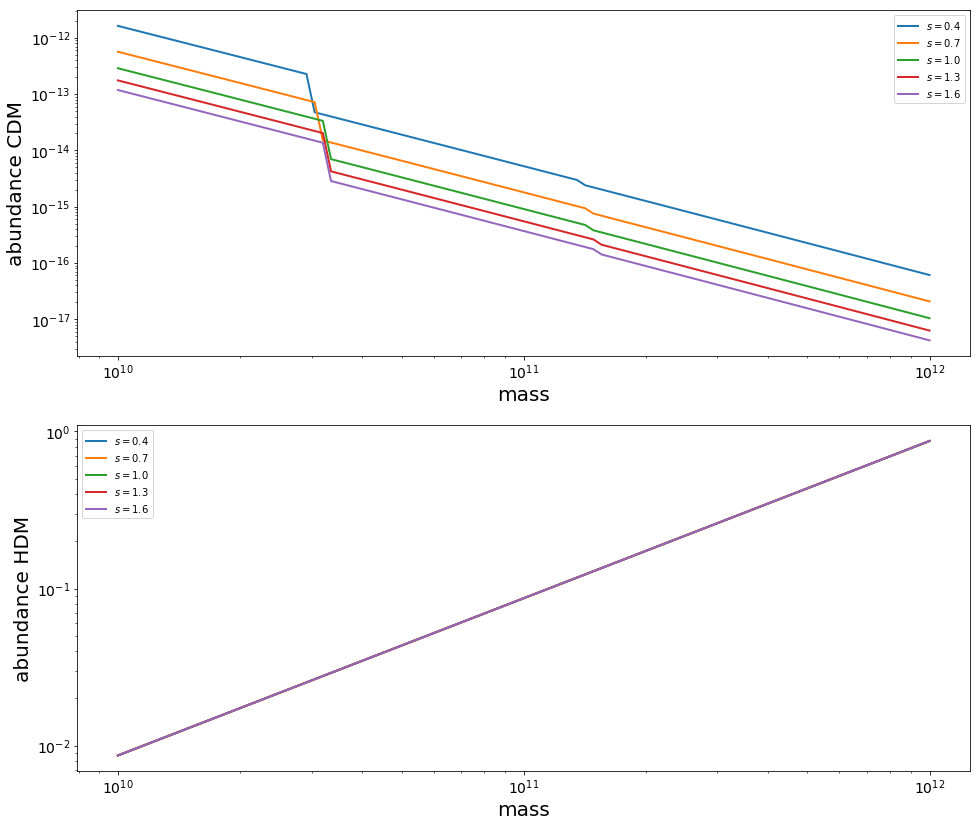

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,14))
i=0

for OM_cold in OM_CDM:
    ax1.plot(masses, OM_cold, lw=2, label= r'$s = {0:.1f}$'.format(scales[i]))
    i+=1
    
i=0
for OM_hot in OM_HDM:
    ax2.plot(masses, OM_hot, lw=2, label= r'$s = {0:.1f}$'.format(scales[i]))
    i+=1

for ax in (ax1,ax2):
    ax.tick_params(labelsize=16)

ax1.set_xlabel("mass", fontsize=20)
ax1.set_ylabel("abundance CDM", fontsize=20)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax2.set_xlabel("mass", fontsize=20)
ax2.set_ylabel("abundance HDM", fontsize=20)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.show()

NOTE: Parameter $s$ appears via:

$$\sigma_{CDM} = {(s G_F)}^2 m^2$$ and the analogous

$$\sigma_{HDM} = {(s G_F)}^2 T^2$$

It is what we've called 'scale', and concentrate our lack of knowledge of the exact cross-sections for the relevant processes at freeze-out.

The dents in the CDM graph indicates the change in the relativistic degrees of freedom. 

In [19]:
def H(T):
    
    # Hubble constant in terms
    # of the temperature.
    
    density = (g_s(T)*T**4)*(np.pi**2)/(30)
    
    return np.sqrt(8*np.pi*G*density/3)

## 2. Relic abundance for non instantaneous freeze-out

From Steigman et al. 2012 section II-2, the following equations can be used to find Y as a function of x.

\begin{equation}
\frac{dW}{dx} = \frac{\lambda}{x^{2}} \left ( 1 + \frac{1}{3}\frac{dlng_{s}}{dlnT} \right ) \frac{g_{s}}{g_{\rho}^{1/2}} (e^{(2W_{eq} - W)} - e^{W})
\end{equation}

where $$\lambda = 2.76 \times 10^{35} m\langle{\sigma v} \rangle $$

\begin{equation}
W = ln(Y)
\end{equation}

\begin{equation}
Y_{\mathrm{eq}} = 0.145 \left ( \frac{g_{\chi}}{g_{s}} \right ) x^{3/2} e^{-x}
\end{equation}


We can adjust the value of $\langle{\sigma v} \rangle$ in the range 10$^{-26}$ - 10$^{-25}$ cm$^{3}$/s.

The range for the mass varies between 0.1 and 10$^{4}$ GeV.

In the article the approximation has also been made that $$g = g_{\rho} = g_{s}$$

In [20]:
avg_sigma_vel = 5*1e-26 #cm**3/s

Define the functions necessary to evaluate the derivative. 

In [10]:
def lambda_function(m,avg_sigma_vel,scale):
    
    return (2.76*10**(35))*m*avg_sigma_vel*scale**2

In [11]:
def W_eq(x,m):
    
    g = 2    # We take it to be a fermion with 2 degrees of freedom.
    
    Y_eq = 0.145*(g/g_s(m/x))*x**(3/2)*np.exp(-x)
    
    return np.log(Y_eq)

In [21]:
def dlngs_dlnt(T):
    function = lambda temp: np.log(g_s(temp))
    return (deriv(function, T) * T)

In [22]:
def derivative_W(m, scale, x, W):
    
    return (lambda_function(m, avg_sigma_vel, scale)/x**2)*(1+(1/3)*dlngs_dlnt(m/x))*np.sqrt(g_s(m/x))*(np.exp(2*W_eq(x,m)-W)-np.exp(W))

def solve_W(x, m, scale):
    
    # x = array with the points we want to evaluate W
    
    function = lambda x,W: np.array(derivative_W(m, scale, x, W))
    x_range = np.array([1, 1000])
    W0 = np.array([W_eq(x_range[0], m)])

    W = solve_ivp(function, [1, 1000], y0=W0, method='BDF', t_eval=x)
                         
    return W

In [14]:
def Y(x, m, scale):
    W = solve_W(x, m, scale)
    return np.exp(W.y)

Plot Y for non instantaneous freeze-out as a function of x for the situations where we vary the cross section or the mass:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


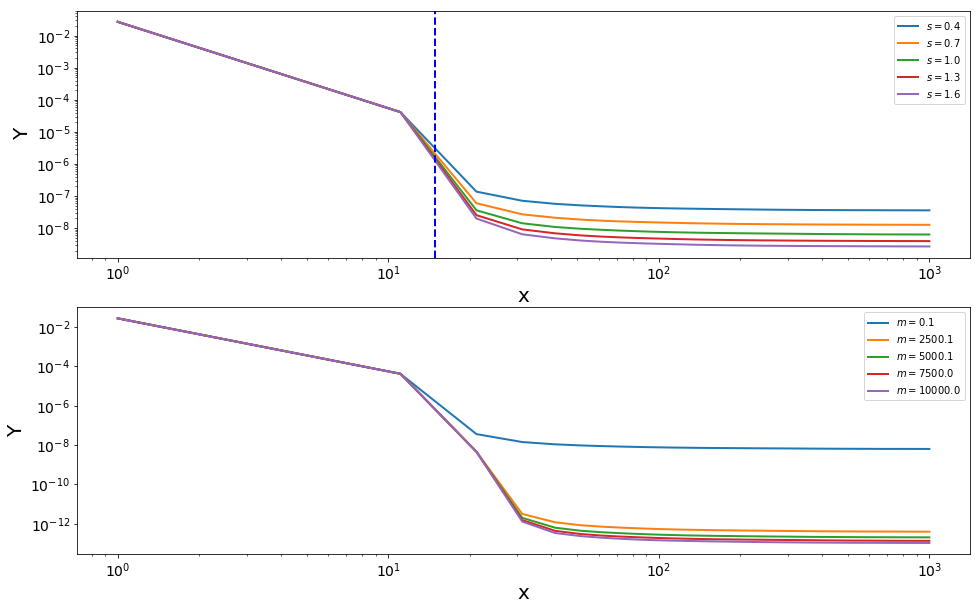

In [17]:
x_min = 1
x_max = 1000
num_x = 100
x = np.linspace(x_min, x_max, num_x)

m = 0.1
scale_min = 0.4
scale_max = 1.6
n_scales = 5
scales = np.linspace(scale_min, scale_max, n_scales)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

for scale in scales:
    ax1.plot(x, Y(x, m, scale)[0], lw=2, label=r'$s = {0:.1f}$'.format(scale))

x_fo = m*1e9/T_fo_CDM(masses=m*1e9, scale=1)

ax1.axvline(x=x_fo, lw=2, ls='--', color='blue')
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('Y', fontsize=20)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

scale=1
mass_min = 0.1
mass_max = 1e4
n_masses = 5
masses = np.linspace(mass_min, mass_max, n_masses)
#masses = np.logspace(np.log(mass_min), np.log(mass_max), n_masses)
for mass in masses:
    ax2.plot(x, Y(x, mass, scale)[0], lw=2, label=r'$m = {0:.1f}$'.format(mass))
    
ax2.set_xlabel('x', fontsize=20)
ax2.set_ylabel('Y', fontsize=20)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
plt.show()
